In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()

'C:\\Users\\up332\\Desktop\\My Data'

In [133]:
x =np.linspace(0,3,31)
#print(x)
n = 31;
h = x[1]-x[0]
print(h)
th =16;

r=np.zeros(n);v=np.zeros(n);T=np.zeros(n);f=np.zeros(n)
#% initial grid point values at t = 0
r = 1-0.3146*x;                 
T[:] = 1-0.2314*x[:];           
v = (0.1+1.09*x)*((T)**(0.5));    

#%assumed quantities
a = 1+2.2*(x-1.5)**2;                   
C= 0.5; g = 1.4;emax = 1e-3; k=0

print(T,'\n---\n',v,'\n---\n',r)
#f = (C*h)/((np.sqrt(T)) + v)
#print(f)
#dt = min(f)
#print(dt)
#plt.plot(x,r)

0.1
[1.      0.97686 0.95372 0.93058 0.90744 0.8843  0.86116 0.83802 0.81488
 0.79174 0.7686  0.74546 0.72232 0.69918 0.67604 0.6529  0.62976 0.60662
 0.58348 0.56034 0.5372  0.51406 0.49092 0.46778 0.44464 0.4215  0.39836
 0.37522 0.35208 0.32894 0.3058 ] 
---
 [0.1        0.20656772 0.31055431 0.41191227 0.5105917  0.60654011
 0.69970225 0.79001982 0.87743124 0.96187135 1.04327104 1.12155693
 1.19665091 1.26846965 1.33692406 1.40191865 1.46335081 1.52110994
 1.57507649 1.62512075 1.67110158 1.71286469 1.75024077 1.78304316
 1.81106497 1.83407564 1.85181659 1.86399585 1.87028111 1.87029082
 1.86358258] 
---
 [1.      0.96854 0.93708 0.90562 0.87416 0.8427  0.81124 0.77978 0.74832
 0.71686 0.6854  0.65394 0.62248 0.59102 0.55956 0.5281  0.49664 0.46518
 0.43372 0.40226 0.3708  0.33934 0.30788 0.27642 0.24496 0.2135  0.18204
 0.15058 0.11912 0.08766 0.0562 ]


In [134]:
while k<1400:
    k+=1
    #-----time stp
    for i in range(n):
        f[i] = (C*h)/((np.sqrt(T[i])) + v[i])
        #print(f)
    dt = min(f)
    #dt=.0201
    #print(dt,'\n--------\n')
    ro = r.copy(); vo = v.copy();To = T.copy();
    rp = np.zeros(n); vp= np.zeros(n); Tp = np.zeros(n)
    ra = np.zeros(n); va= np.zeros(n); Ta = np.zeros(n)
    rc = np.zeros(n); vc= np.zeros(n); Tc = np.zeros(n)
    rp1 = np.zeros(n);vp1 = np.zeros(n);Tp1 = np.zeros(n)
    #--------predict
    for i in range(n):
        if i>0 and i<n-1:
            dv = (v[i+1] - v[i])/h; 
            da = (np.log(a[i+1]) - np.log(a[i]))/h;
            dr = (r[i+1] - r[i])/h; 
            dT =(T[i+1] - T[i])/h 
            rp[i] = -  (r[i]*dv) - (r[i]*v[i]*da)  - (v[i]*dr)
            vp[i] = -  (v[i]*dv) - ( (1/g)*(dT + (T[i]/r[i])*dr) )
            Tp[i] = -  (v[i]*dT) - ( (g-1)*T[i]*(dv+ (v[i]*da) )  )
            
            v[i]= v[i] + vp[i]*dt
            r[i]= r[i] + rp[i]*dt
            T[i]= T[i] + Tp[i]*dt
    #print('\n---Tp--\n',Tp)
    for i in range(n):
        if i>0 and i<n-1:
            dv = v[i] - v[i-1]; 
            da = np.log(a[i]) - np.log(a[i-1]);
            dr = r[i] - r[i-1]; 
            dT =T[i] - T[i-1] 
            rc[i] = -  (r[i]*dv/h) - (r[i]*v[i]*da/h)  - (v[i]*dr /h)
            vc[i] = -  (v[i]*dv/h) - ( (1/g)*(dT + (T[i]/r[i])*dr)/h)
            Tc[i] = -  (v[i]*dT/h) - ( (g-1)*T[i]*(dv+ (v[i]*da) )  /h)
    #print('\nTc---\n',Tc)
    ra = 0.5*(rp+rc)
    va = 0.5*(vp+vc)
    Ta = 0.5*(Tp+Tc)
    #print('\n--\n',Ta)
    for i in range(n):
        if i>0 and i<n-1:
            r[i]=ro[i]+(ra[i]*dt)
            v[i]=vo[i]+(va[i]*dt)
            T[i]=To[i]+(Ta[i]*dt)
    #print('\n--T--\n',T)
    #BCs--------
    v[0] = 2*v[1]-v[2]
    v[-1] = 2*v[-2] - v[-3]
    r[-1] = 2*r[-2] - r[-3]
    T[-1] = 2*T[-2] - T[-3]
    #print('\n--T--\n',T)
    #-----------
    m = r*a*v; p = r*T; M = v/np.sqrt(T);

print(m,'\n---\n',r)

[0.58775196 0.59366145 0.58907473 0.59098615 0.58924812 0.58940831
 0.58846109 0.58801684 0.58724032 0.58659252 0.5858837  0.58526534
 0.58472032 0.58428871 0.5839613  0.58376859 0.58379328 0.58412313
 0.5847734  0.58566774 0.58668816 0.58773277 0.58871668 0.58963059
 0.59039528 0.59115712 0.59158921 0.59251624 0.59182738 0.59551323
 0.5855348 ] 
---
 [1.         0.99779703 0.99703034 0.99427741 0.99164719 0.98734222
 0.98181488 0.97378775 0.96262348 0.94666945 0.92413506 0.89250035
 0.84918067 0.79207381 0.72097542 0.63869089 0.55102888 0.46498576
 0.38635487 0.31838096 0.2618377  0.21592013 0.17907414 0.14965467
 0.12609971 0.10721078 0.09186352 0.07947623 0.06904757 0.06095248
 0.05285738]


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]


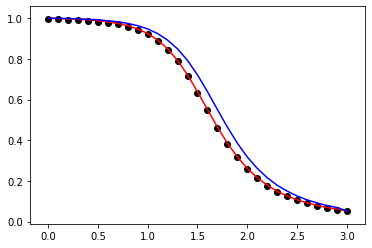

In [141]:
y=[1,0.999,0.998,0.997,0.994,0.992,0.987,0.982,0.974,0.963,0.947,0.924,0.892,0.849,0.792,0.721,0.639,0.551,0.465,0.386,0.318,0.262,0.216,0.179,0.150,0.126,0.107,0.092,0.079,0.069,0.053]
D =[0.995,0.994,0.992,0.99,0.987,0.983,0.978,0.97,0.958,0.942,0.92,0.888,0.844,0.787,0.716,0.634,0.547,0.461,0.382,0.315,0.258,0.213,0.176,0.147,0.124,0.105,0.09,0.078,0.068,0.059,0.052]
K=max(abs((D-r)/D))
print(K)
plt.plot(x,r,color='red')
plt.plot(x,y,color='blue')
plt.scatter(x,D,color='black')
#plt.plot(x,a)
#plt.plot(x,M)
#plt.plot(x,m)

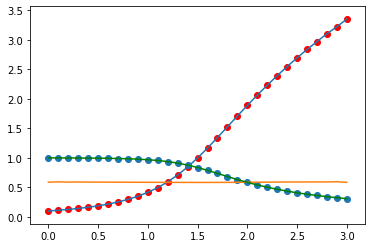

In [148]:
N = [0.099,0.112,0.125,0.143,0.163,0.187,0.216,0.252,0.296,0.350,0.416,0.496,0.594,0.710,0.846,0.99,1.167,1.345,1.528,1.710,1.89,2.065,2.233,2.394,2.549,2.696,2.839,2.972,3.105,3.225,3.353]
F = [1,0.999,0.999,0.998,0.997,0.995,0.993,0.989,0.985,0.978,0.969,0.956,0.937,0.911,0.878,0.836,0.789,0.737,0.684,0.633,0.585,0.541,0.502,0.467,0.436,0.408,0.384,0.362,0.342,0.325,0.308]
plt.plot(x,M)
plt.scatter(x,N,color='red')
plt.plot(x,m)
plt.plot(x,T,'g')
plt.scatter(x,F)